In [26]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, linear, softmax 
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt

Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Show first Element

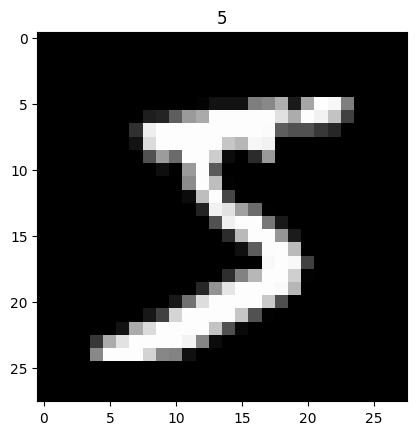

In [13]:
plt.imshow(x_train[0], cmap='gray')
plt.title(y_train[0])
plt.show()

Build Neural Network
Note here we use a `Flatten` layer to reshape the inputs to vector

In [80]:
model = Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    Dense(25, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='linear')
])

Check model's parameter

In [81]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 25)                19625     
                                                                 
 dense_16 (Dense)            (None, 15)                390       
                                                                 
 dense_17 (Dense)            (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


Comiple model

In [82]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
)

Train the model

In [83]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8971
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0731
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8456
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5954
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3659
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2962
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2512
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2291
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2116
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1990


Evaluate the model's performance

In [84]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2515


0.25150689482688904

Visualize the prediction on random 64 examples in test set

In [85]:
test_index = [np.random.randint(x_test.shape[0]) for i in range(64)]
x_subs = x_test[test_index]
y_subs = y_test[test_index]

2/2 [==============================] - 0s 3ms/step


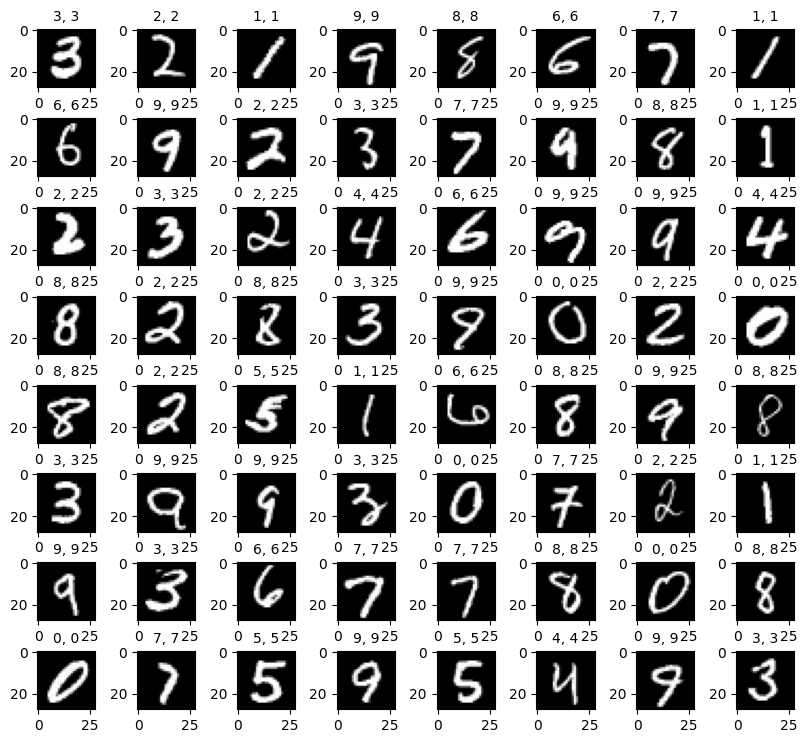

In [86]:
fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92])

predictions = model.predict(x_subs)
viewed = 0

for i,ax in enumerate(axes.flat):
    # Select random indices
    ax.imshow(x_subs[viewed], cmap="gray")
    
    prediction = tf.nn.softmax(predictions[viewed])
    yhat = np.argmax(prediction)
    
    ax.set_title(f"{yhat}, {y_subs[viewed]}",fontsize=10)
    viewed += 1